In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"가톨릭대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [3]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [4]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [5]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
과학: 0.0215
신앙: 0.0134
현대: 0.0120
기독교: 0.0112
마태복음: 0.0083
교회: 0.0082
신학: 0.0061
이라는: 0.0061
안: 0.0053
주제: 0.0053

토픽 2:
성경: 0.0172
대한: 0.0102
교회: 0.0085
순교자: 0.0078
쉽게: 0.0078
이해: 0.0077
주석: 0.0070
희망: 0.0070
권: 0.0061
시리즈: 0.0061

토픽 3:
역사: 0.0188
공의회: 0.0126
저자: 0.0087
교회: 0.0079
성경: 0.0076
삶: 0.0076
대한: 0.0069
신학: 0.0064
예수: 0.0063
이해: 0.0052

토픽 4:
하나님: 0.0186
교리: 0.0159
사회: 0.0146
은총: 0.0107
말씀: 0.0094
이해: 0.0081
서: 0.0055
분: 0.0055
신학: 0.0055
목사: 0.0055

토픽 5:
공의회: 0.0189
차: 0.0123
결혼: 0.0083
교회: 0.0083
준다: 0.0070
사도신경: 0.0070
라테: 0.0069
성경: 0.0057
데: 0.0056
생활: 0.0056



In [6]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.3296952637464566


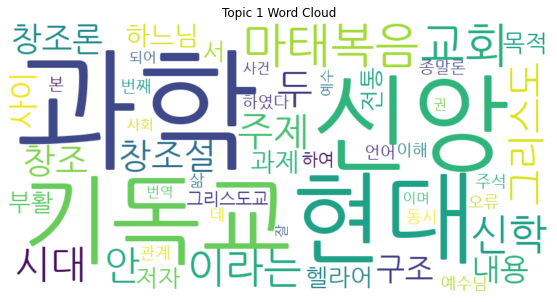

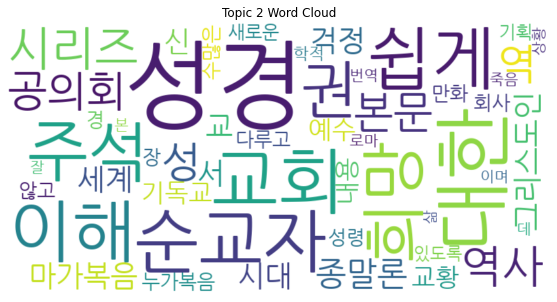

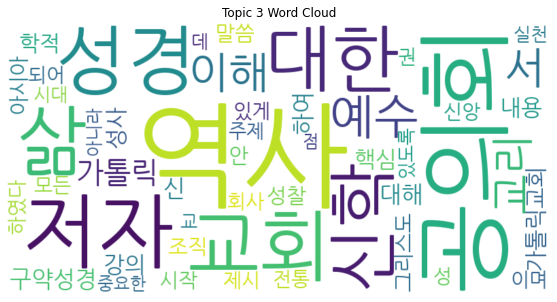

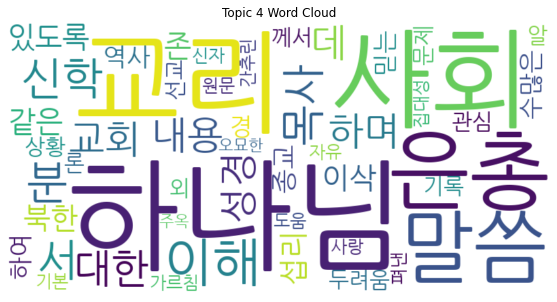

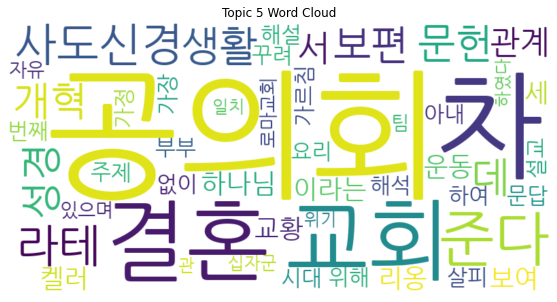

In [7]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [8]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [9]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [10]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
저자: 0.0297
이며: 0.0253
교수: 0.0195
칼빈: 0.0135
신학: 0.0106
신학대: 0.0106
대학교: 0.0091
신: 0.0091
신학회: 0.0091
대한: 0.0091

토픽 2:
신학: 0.0189
교회: 0.0172
후: 0.0124
교수: 0.0120
서강대: 0.0111
하였다: 0.0096
신학교: 0.0088
가톨릭: 0.0088
미국: 0.0088
사제: 0.0071

토픽 3:
졸업: 0.0096
대학원: 0.0085
하나님: 0.0085
국제: 0.0085
신학: 0.0085
신: 0.0067
언어: 0.0058
대학교: 0.0058
세계: 0.0058
성: 0.0044

토픽 4:
대학교: 0.0123
교수: 0.0103
대교구: 0.0103
간추린: 0.0083
신부: 0.0083
회사: 0.0083
천주교: 0.0083
주: 0.0064
교황청: 0.0064
사제품: 0.0064

토픽 5:
신학: 0.0239
교회: 0.0174
대학원: 0.0112
학위: 0.0094
대학교: 0.0089
대학: 0.0082
성경: 0.0077
박사: 0.0077
저서: 0.0076
신학대: 0.0069



In [11]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.4876411909059346


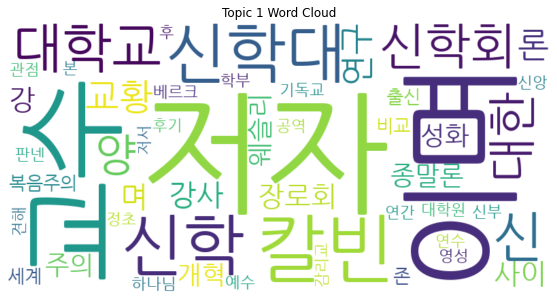

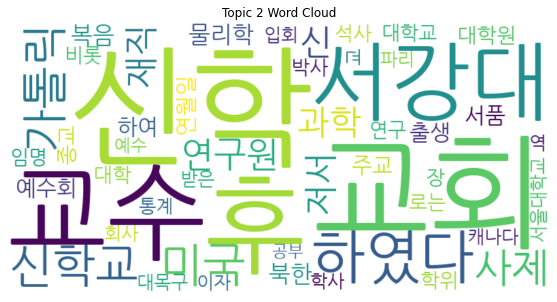

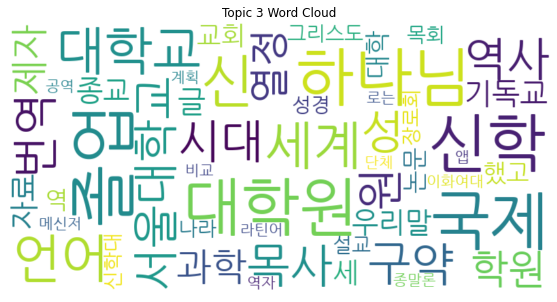

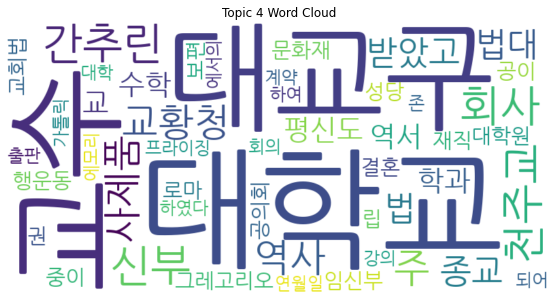

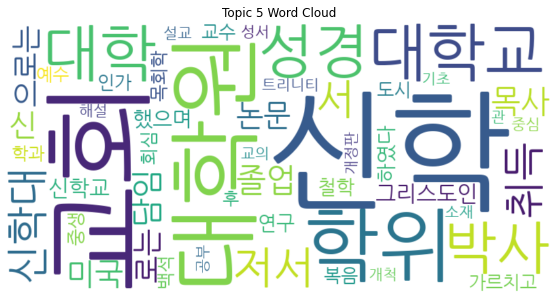

In [12]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()